<small>Ok trying to do this using notebook instead, should be faster with data labeling process</small>

In [1]:
!nvidia-smi

Mon Jan 19 22:55:07 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 591.59                 Driver Version: 591.59         CUDA Version: 13.1     |
+-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3070 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   53C    P0             25W /  100W |     207MiB /   8192MiB |      3%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

c:\Users\apurv\Downloads\Apurva Downloads\Python\imaging_stuff\services


In [3]:
!pip install ultralytics==8.3.19

# prevent ultralytics from tracking your activity
!yolo settings sync=False

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.19  Python-3.13.5 torch-2.9.1+cpu CPU (12th Gen Intel Core(TM) i9-12900H)
Setup complete  (20 CPUs, 15.7 GB RAM, 668.2/930.5 GB disk)


In [5]:
#We will use supervision for rendering boxes and labels
!pip install supervision[assets]==0.24.0
from IPython import display
display.clear_output

import supervision as sv
print("supervision version:", sv.__version__)

supervision version: 0.24.0


In [7]:
#Downloading the sample video cuz youtube is a bitch and doesnt let me download videos w/o premium
from supervision.assets import download_assets, VideoAssets

SOURCE_VIDEO_PATH = download_assets(VideoAssets.VEHICLES)

vehicles.mp4 asset download complete. 



In [8]:
#Now load the pre-trained YOLO model
from ultralytics import YOLO
model = YOLO("yolov8x.pt")

100%|██████████| 131M/131M [00:05<00:00, 24.2MB/s] 


In [9]:
#Dict mapping class_id to class_name
CLASS_NAMES_DICT = model.model.names

#the class names we chose
SELECTED_CLASS_NAMES = ['car', 'motorcycle', 'bus', 'truck']

#class ids matching the class names we have chosen
SELECTED_CLASS_IDS = [
    {value: key for key, value in CLASS_NAMES_DICT.items()}[class_name]
    for class_name
    in SELECTED_CLASS_NAMES
]

In [10]:
import supervision as sv
import numpy as np

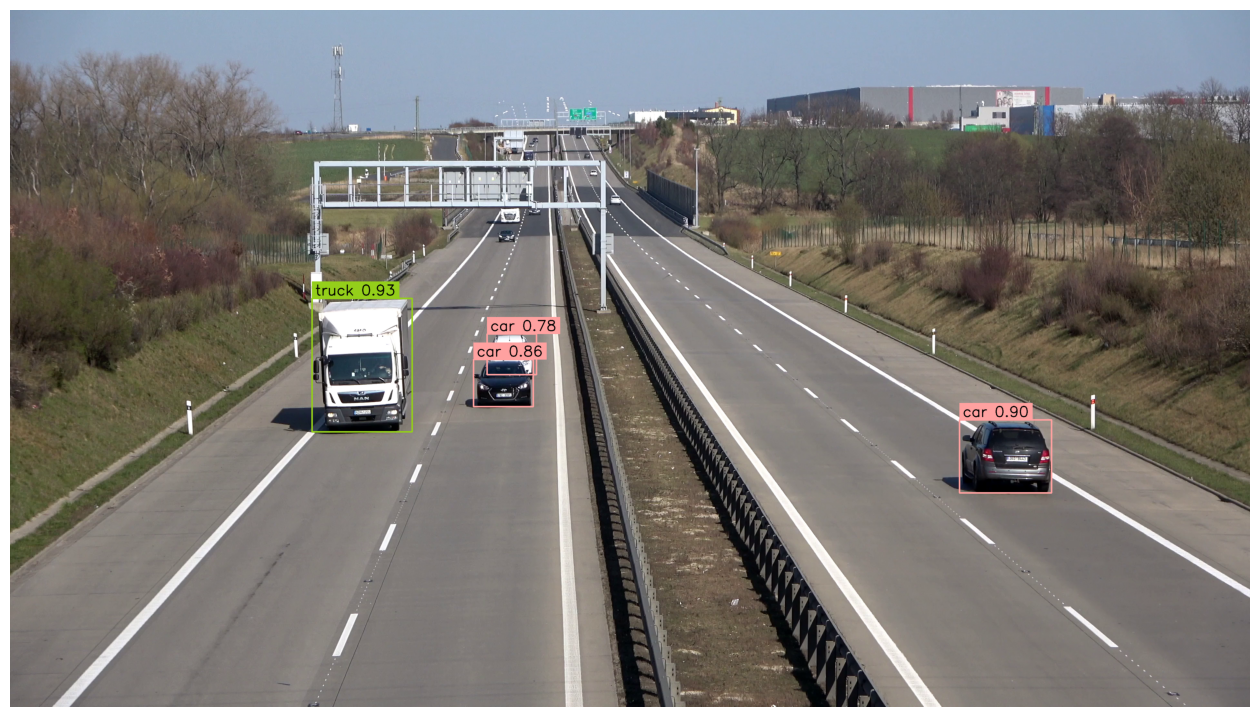

In [17]:
#Create from generator
from sympy import false


generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)

#Now create instance of BoxAnnotator and LabelAnnotator
box_annotator = sv.BoxAnnotator(thickness=4)
label_annotator = sv.LabelAnnotator(text_thickness=2, text_scale=1.5, text_color=sv.Color.BLACK)

#Now we want the first video frame
iterator = iter(generator)
frame = next(iterator)

#model prediction on single frame and conversion to supervision Detections
results = model(frame, verbose=False)[0]

#Now convert to Detections
detections = sv.Detections.from_ultralytics(results)

#Only should consider class id from selected_classes that we defined abniove
detections = detections[(np.isin(detections.class_id, SELECTED_CLASS_IDS))]

#Also custom labels (we make them 2 decimal points for confidence of their prediction)
labels = [
    f"{CLASS_NAMES_DICT[int(class_id)]} {confidence:0.2f}"
    for confidence, class_id in zip(detections.confidence, detections.class_id)
]
#Now annotate the frame and displaty frame
annotated_frame = frame.copy()
annotated_frame = box_annotator.annotate(
    scene=annotated_frame,
    detections=detections
)
annotated_frame = label_annotator.annotate(
    scene=annotated_frame,
    detections=detections,
    labels=labels
)
%matplotlib inline
#This just defines the size of the image
sv.plot_image(annotated_frame, (16, 16))

In [ ]:
#Ok well I wanna do this for the whole video now
#Settings
LINE_START = sv.Point(0 + 50)